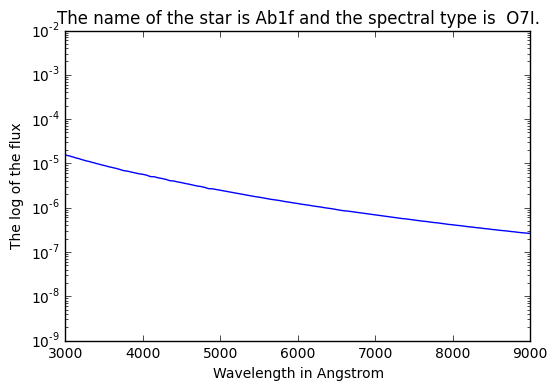

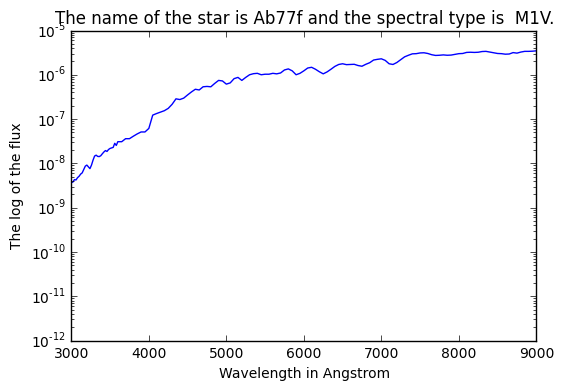

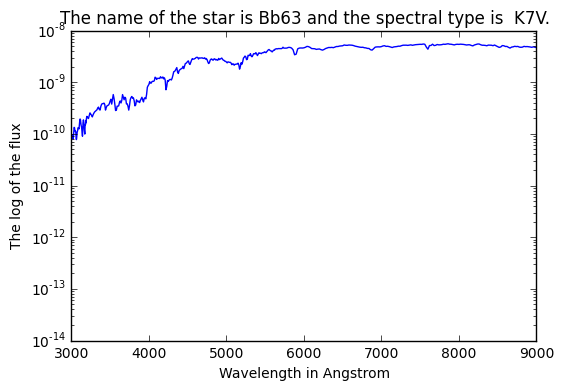

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sp
from astropy.io import fits
%matplotlib inline

def read(name):
    #reads csv file
    return(pd.read_table(name,sep = ','))

def calculating(name1, name2, name3):
    #function that reads in csv file, then looks what its spectra type is, then plots the flux against the wavelength.
    wavelength_and_flux = read(name1)
    spectra = read("Data/spectra.list.csv")
    
    # Series are directly iterable (like a list)
    j = 0
    for i in spectra['#filename']:
        j = j + 1
        if(i == name2):
            type_name = spectra[' type'][j]
       
    #genormaliseerd flux
    #wavelength_and_flux[' flux'] = wavelength_and_flux[' flux']/wavelength_and_flux.sum(axis = 1)

    plot("The name of the star is " + name3 + " and the spectral type is " + type_name + ".", wavelength_and_flux['# wavelength'], wavelength_and_flux[' flux'])

def plot(title, x, y):
    #function to plot
    plt.plot(x, y)
    plt.yscale("log")
    plt.ylabel("The log of the flux")
    plt.xlabel("Wavelength in Angstrom")
    plt.xlim(3000,9000)
    plt.title(title)
    plt.show()

#Question 1
calculating("Data/Ab1f.dat.fix", "Ab1f.dat.fix", "Ab1f")

calculating("Data/Ab77f.dat.fix", "Ab77f.dat.fix", "Ab77f")

calculating("Data/Bb63.dat.fix", "Bb63.dat.fix", "Bb63")


In [2]:
'''
import seaborn as sns
import mpld3
from bokeh.models import Title
from bokeh.plotting import figure, output_file, show, output_notebook
output_notebook()
mpld3.enable_notebook()

def plotbokeh(title, x, y):#plots file with bokeh
    #Plotting with Bokeh(trying it out)
    p = figure(title=title, y_axis_type="log", x_range=(3000, 9000), y_range=(10**-14, 10**-2))
    p.line(x=x, y=y)
    p.add_layout(Title(text="The log of the flux", align="center"), "left")
    p.add_layout(Title(text="Wavelength in Angstrom", align="center"), "below")
    p.grid.grid_line_color = None
    show(p, notebook_handle=True)
    
a, b, c = calculating("Ab1f.dat.fix")
plotbokeh(a, b, c)

a, b, c = calculating("Ab77f.dat.fix")
plotbokeh(a, b, c)

a, b, c = calculating("Bb63.dat.fix")
plotbokeh(a, b, c)
'''

'\nimport seaborn as sns\nimport mpld3\nfrom bokeh.models import Title\nfrom bokeh.plotting import figure, output_file, show, output_notebook\noutput_notebook()\nmpld3.enable_notebook()\n\ndef plotbokeh(title, x, y):#plots file with bokeh\n    #Plotting with Bokeh(trying it out)\n    p = figure(title=title, y_axis_type="log", x_range=(3000, 9000), y_range=(10**-14, 10**-2))\n    p.line(x=x, y=y)\n    p.add_layout(Title(text="The log of the flux", align="center"), "left")\n    p.add_layout(Title(text="Wavelength in Angstrom", align="center"), "below")\n    p.grid.grid_line_color = None\n    show(p, notebook_handle=True)\n    \na, b, c = calculating("Ab1f.dat.fix")\nplotbokeh(a, b, c)\n\na, b, c = calculating("Ab77f.dat.fix")\nplotbokeh(a, b, c)\n\na, b, c = calculating("Bb63.dat.fix")\nplotbokeh(a, b, c)\n'

2.
a)An Angstrom($\si{\angstrom}$) is 10$^{-10}$ m.
b)The unit of flux density is in SI units W/m$^2$ and another unit can be the Jansky.
c)

In [3]:
#Question 3 a
iets = read('Data/vega.fnu.csv')
iets['#wavelength'] = iets['#wavelength'] * 10
wavelength = iets['#wavelength']

iets.flux = iets.flux*3e18/(wavelength**2)
Flux = iets.flux
name_filter = ["U", "B", "V"]
lambd_0 = [3659, 4582, 5448]
lambd_delta = [660, 940, 880]
l = []

for i in range(3):
    lamnieuw = np.linspace(lambd_0[i]-lambd_delta[i]/2,lambd_0[i]+lambd_delta[i]/2, 100)
    Fnieuw = np.interp(lamnieuw, wavelength, Flux)
    Cx = 2.5 * np.log10(np.trapz( Fnieuw * lamnieuw, lamnieuw )/ np.trapz(lamnieuw,lamnieuw))
    Mag = -2.5 * np.log10( np.trapz( Fnieuw * lamnieuw, lamnieuw )/ np.trapz(lamnieuw,lamnieuw) ) + Cx
    l.append(Cx)
print(l)

[-20.906037214965792, -20.600456877808334, -21.10453294444136]


/usr/lib64/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


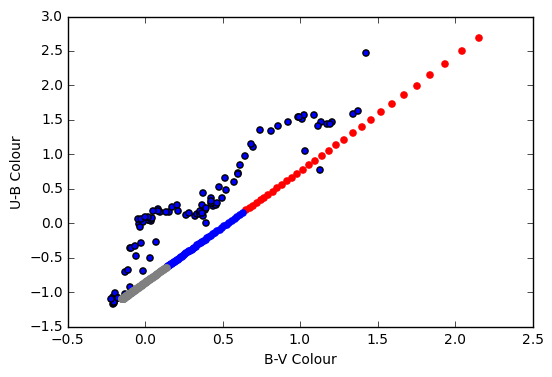

In [4]:
#Question 3 a and b
def m_x(lambd_0,lambd_delta,C_x,iets1):
    lamnieuw = np.linspace(lambd_0-lambd_delta/2,lambd_0+lambd_delta/2, 100)
    Fnieuw = np.interp(lamnieuw, iets1['# wavelength'], iets1[' flux'] )
    return(-2.5 * np.log10( np.trapz( Fnieuw * lamnieuw, lamnieuw )/ np.trapz(lamnieuw,lamnieuw) ) + C_x)

def planck(lambd_0, lambd_delta, T):
    h = 6.626e-34
    c = 3.00e18
    k_B = 1.38e-23
    lamnieuw = np.linspace(lambd_0-lambd_delta/2,lambd_0+lambd_delta/2, 100)
    return((2*h*(c**2)/(lamnieuw**5))*(1/(np.exp((h*c)/(lamnieuw*k_B*T))-1)))

def m_x1(lambd_0,lambd_delta,C_x,iets1,Fnieuw):
    lamnieuw = np.linspace(lambd_0-lambd_delta/2,lambd_0+lambd_delta/2, 100)
    return(-2.5 * np.log10( np.trapz( Fnieuw * lamnieuw, lamnieuw )/ np.trapz(lamnieuw,lamnieuw) ) + C_x)

T = np.arange(2000, 30100, 100)

spectra = read("Data/spectra.list.csv")

j = 0

B_V = []
U_B = []

for i in spectra['#filename']:
    i = "Data/" + i
    iets1 = read(i)
    
    type_name = spectra[' type'][j]

    U = m_x(lambd_0[0],lambd_delta[0],l[0],iets1)
    B = m_x(lambd_0[1],lambd_delta[1],l[1],iets1)
    V = m_x(lambd_0[2],lambd_delta[2],l[2],iets1) 
    B_V.append(B-V)
    U_B.append(U-B)
    
    #print("For filter ", name_filter[0],",and the star", i, ", the magnitude is",m_x(lambd_0[0],lambd_delta[0],l[0],iets1))
    #print("For filter ", name_filter[1],",and the star", i, ", the magnitude is",m_x(lambd_0[1],lambd_delta[1],l[1],iets1))
    #print("For filter ", name_filter[2],",and the star", i, ", the magnitude is",m_x(lambd_0[2],lambd_delta[2],l[2],iets1))
    plt.scatter(m_x(lambd_0[1],lambd_delta[1],l[1],iets1)-m_x(lambd_0[2],lambd_delta[2],l[2],iets1), m_x(lambd_0[0],lambd_delta[0],l[0],iets1)-m_x(lambd_0[1],lambd_delta[1],l[1],iets1))
     
B_V = np.asarray(B_V)
U_B = np.asarray(U_B)
    
B_VT = []
U_BT = []

#print(m_x1(lambd_0[0],lambd_delta[0],l[0],iets1, planck(lambd_0[0],lambd_delta[0], T[260])))


for i in range(len(T)):
    UT = m_x1(lambd_0[0],lambd_delta[0],l[0],iets1, planck(lambd_0[0],lambd_delta[0], T[i]))
    BT = m_x1(lambd_0[1],lambd_delta[1],l[1],iets1, planck(lambd_0[1],lambd_delta[1], T[i]))
    VT = m_x1(lambd_0[2],lambd_delta[2],l[2],iets1, planck(lambd_0[2],lambd_delta[2], T[i]))
    
    B_VT.append(BT - VT)
    U_BT.append(UT - BT)
    
B_VT = np.asarray(B_VT)
U_BT = np.asarray(U_BT)
for i in range(len(T)):
    if(T[i]<= 5000):
        plt.scatter(B_VT[i], U_BT[i], color='red')
    elif(T[i] > 10000):
        plt.scatter(B_VT[i], U_BT[i], color='grey')
    elif(T[i]> 5000):
        plt.scatter(B_VT[i], U_BT[i], color='blue')
plt.xlabel("B-V Colour")
plt.ylabel("U-B Colour")

/usr/lib64/python3.4/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "
/usr/lib64/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


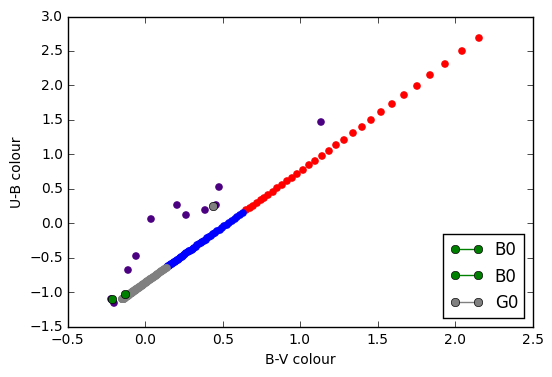

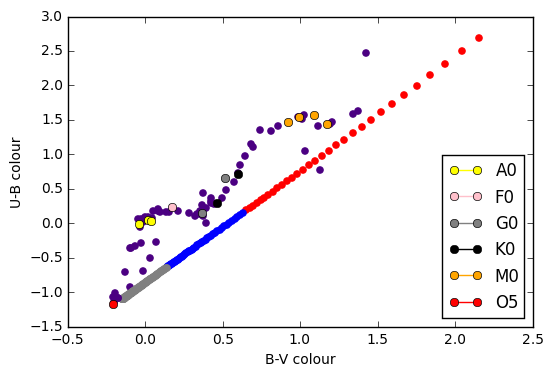

In [5]:
#Plots 3 b
j = 0
r, s, t, u = 0, 0, 0, 0
for i in spectra['#filename']:
    i = "Data/" + i
    iets1 = read(i)
    
    type_name = spectra[' type'][j]
    
    if "I" in type_name:
        if(type_name == " B0I"):
            plt.plot(B_V[j], U_B[j], color='green', label="B0", marker = "o")
            for i in range(len(T)):
                if(T[i]<= 5000):
                    plt.scatter(B_VT[i], U_BT[i], color='red')
                elif(T[i] > 10000):
                    plt.scatter(B_VT[i], U_BT[i], color='grey')
                elif(T[i]> 5000):
                    plt.scatter(B_VT[i], U_BT[i], color='blue')

        elif(type_name == " G0I"):
            plt.plot(B_V[j], U_B[j],color='grey', label="G0", marker = "o")

        elif(type_name == " F0I"):
            plt.plot(B_V[j], U_B[j],color='pink', label="F0", marker = "o")

        else:
            plt.scatter(B_V[j], U_B[j], color = ['indigo'])
        plt.figure(0)
        plt.legend(loc = 4)
    else:
        if(type_name == " O5V"):
            plt.plot(B_V[j], U_B[j],color='red', label="O5", marker = "o")

        elif(type_name == " B0V"):
            plt.plot(B_V[j], U_B[j],color='green', label="B0", marker = "o")

        elif(type_name == " A0V"):
            if(r == 0):
                plt.plot(B_V[j], U_B[j],color='yellow', label="A0", marker = "o")

                r = r + 1
            else:
                plt.plot(B_V[j], U_B[j],color='yellow', marker = "o")

        elif(type_name == " G0V"):
            if(s == 0):
                plt.plot(B_V[j], U_B[j],color='grey', label="G0", marker = "o")

                s = s + 1
            else:
                plt.plot(B_V[j], U_B[j],color='grey', marker = "o")

        elif(type_name == " K0V"):
            if(t == 0):
                plt.plot(B_V[j], U_B[j],color='black', label="K0", marker = "o")
                for i in range(len(T)):
                    if(T[i]<= 5000):
                        plt.scatter(B_VT[i], U_BT[i], color='red')
                    elif(T[i] > 10000):
                        plt.scatter(B_VT[i], U_BT[i], color='grey')
                    elif(T[i]> 5000):
                        plt.scatter(B_VT[i], U_BT[i], color='blue')
                plt.legend(loc = 4)
                t = t + 1
            else:
                plt.plot(B_V[j], U_B[j],color='black', marker = "o")
         
        elif(type_name == " M0V"):
            if(u == 0):
                plt.plot(B_V[j], U_B[j],color='orange', label="M0", marker = "o")

                u = u + 1                
            else:
                plt.plot(B_V[j], U_B[j],color='orange', marker = "o")
              
        else:
            plt.scatter(B_V[j], U_B[j], color = ['indigo'])
        plt.figure(1)
        plt.legend(loc = 4)
    
    j = j + 1
    plt.xlabel("B-V colour")
    plt.ylabel("U-B colour")
#plt.plot(B_VT, U_BT)
#plt.legend(loc = 4)
#plt.figure(0)
#plt.show()
#plt.plot(B_VT, U_BT)
#plt.legend(loc = 4)
#plt.figure(1)
#plt.show()

#print(len(T))
#print("B0",T[260])
#print("A0",T[80])
#print("G0",T[43])
#print("F0",T[55])
#plt.scatter(B_VT[55], U_BT[55], s=10)
#plt.figure(0)

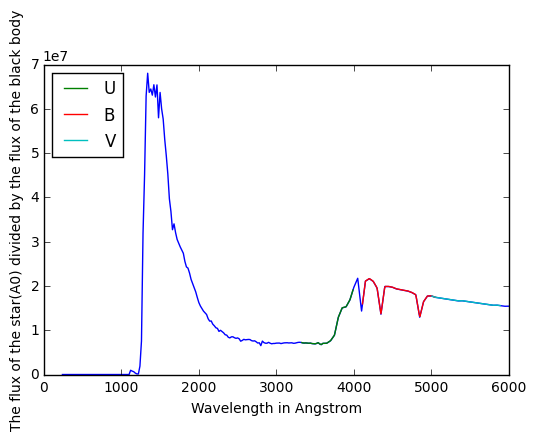

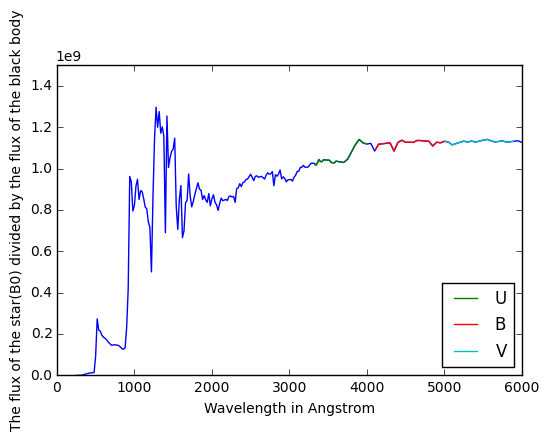

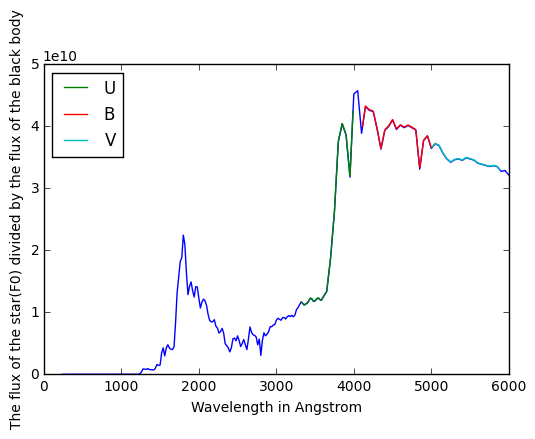

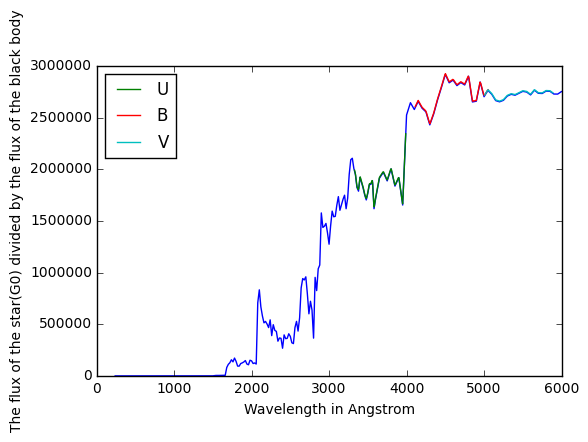

In [6]:
#Question 4
def spectra4(k, lambd_0, lambd_delta):
    y = planck(lambd_0,lambd_delta, T[k])
    lamnieuw = np.linspace(lambd_0-lambd_delta/2,lambd_0+lambd_delta/2, 100)
    Fnieuw = np.interp(lamnieuw, iets1['# wavelength'], iets1[' flux'])
    return(Fnieuw/y, lamnieuw)

def planck2(lamnieuw, T):
    h = 6.626e-34
    c = 2.997e18
    k_B = 1.38e-23
    return((2*h*(c**2)/(lamnieuw**5))*(1/(np.exp((h*c)/(lamnieuw*k_B*T))-1))) 
    
def fullspectra(k, read1, read2):
    y = planck2(read1, T[k])
    return(read2/y, read1)

lambd_0 = [3659, 4582, 5448]
lambd_delta = [330, 470, 440]

t = 0
s = 0
r = 0
j = 0


for i in spectra['#filename']:
    i = "Data/" + i
    iets1 = read(i)
    
    type_name = spectra[' type'][j]
    
    if(type_name == " B0I"):
        y, x = fullspectra(260, iets1['# wavelength'], iets1[' flux'])
        plt.plot(x, y)
        USpec, Ulam = spectra4(260, lambd_0[0], lambd_delta[0]*2)
        BSpec, Blam = spectra4(260, lambd_0[1], lambd_delta[1]*2)
        VSpec, Vlam = spectra4(260, lambd_0[2], lambd_delta[2]*2)
        plt.plot(Ulam, USpec, label="U")
        plt.plot(Blam, BSpec, label="B")
        plt.plot(Vlam, VSpec, label="V")
        plt.xlim(0, 6000)
        plt.ylim(0, 1.5e9)
        plt.xlabel("Wavelength in Angstrom")
        plt.ylabel("The flux of the star(B0) divided by the flux of the black body")
        plt.legend(loc = 4)
        plt.show()
    elif((type_name == " A0V") and (r == 0)):
        y, x = fullspectra(80, iets1['# wavelength'], iets1[' flux'])
        plt.plot(x, y)
        USpec, Ulam = spectra4(80, lambd_0[0], lambd_delta[0]*2)
        BSpec, Blam = spectra4(80, lambd_0[1], lambd_delta[1]*2)
        VSpec, Vlam = spectra4(80, lambd_0[2], lambd_delta[2]*2)
        plt.plot(Ulam, USpec, label="U")
        plt.plot(Blam, BSpec, label="B")
        plt.plot(Vlam, VSpec, label="V")
        plt.xlim(0, 6000)
        plt.ylim(0, 7e7)
        plt.xlabel("Wavelength in Angstrom")
        plt.ylabel("The flux of the star(A0) divided by the flux of the black body")
        plt.legend(loc = "upper left")
        plt.show()
        r = r + 1
    elif((type_name == " F0I") and (s == 0)) :
        y, x = fullspectra(55, iets1['# wavelength'], iets1[' flux'])
        plt.plot(x, y)
        USpec, Ulam = spectra4(55, lambd_0[0], lambd_delta[0]*2)
        BSpec, Blam = spectra4(55, lambd_0[1], lambd_delta[1]*2)
        VSpec, Vlam = spectra4(55, lambd_0[2], lambd_delta[2]*2)
        plt.plot(Ulam, USpec, label="U")
        plt.plot(Blam, BSpec, label="B")
        plt.plot(Vlam, VSpec, label="V")
        plt.xlim(0, 6000)
        plt.ylim(0, 5e10)
        plt.xlabel("Wavelength in Angstrom")
        plt.ylabel("The flux of the star(F0) divided by the flux of the black body")
        plt.legend(loc = "upper left")
        plt.show()        
        s = s + 1
    elif((type_name == " G0V") and (t == 0)):
        y, x = fullspectra(43, iets1['# wavelength'], iets1[' flux'])
        plt.plot(x, y)
        USpec, Ulam = spectra4(43, lambd_0[0], lambd_delta[0]*2)
        BSpec, Blam = spectra4(43, lambd_0[1], lambd_delta[1]*2)
        VSpec, Vlam = spectra4(43, lambd_0[2], lambd_delta[2]*2)
        plt.plot(Ulam, USpec, label="U")
        plt.plot(Blam, BSpec, label="B")
        plt.plot(Vlam, VSpec, label="V")
        plt.xlim(0, 6000)
        plt.ylim(0, 3000000)
        plt.xlabel("Wavelength in Angstrom")
        plt.ylabel("The flux of the star(G0) divided by the flux of the black body")
        plt.legend(loc = "upper left")
        plt.show()        
        t = t + 1
    
    j = j + 1

In [60]:
#Question 5

def magnitude(Flux,exptime,zeropoint):
    return(-2.5*np.log10(Flux/exptime) + zeropoint)

imageB = fits.getdata('Data/exposure_B.fits')
imageV = fits.getdata('Data/exposure_V.fits')

[x1, y1, flux1, sharpness1, roundness1] = sp.find(imageB, 53.1196*4, 5.)
[x2, y2, flux2, sharpness2, roundness2] = sp.find(imageV, 50.9229*4, 5.)

skyradB = [7,7,7,7,7]
skyradV = [5,7,7,7,5]
[fluxB, fluxBerr, skyB, skyBerr] = sp.aper(imageB, x1, y1, (5, ), (5, ), skyrad = [6, 20], badpix = [0, 0], readnoise = 250, flux= True)
[fluxV, fluxVerr, skyV, skyVerr] = sp.aper(imageV, x2, y2, (5, ), (5, ), skyrad = [6, 20], badpix = [0, 0], readnoise = 250, flux= True)

for i in range(5):
    print("magnitude B",i+1,"th star is",magnitude(fluxB[i][0], 30, 16.43))
    print("magnitude V",i+1,"th star is",magnitude(fluxV[i][0], 10, 17.40))
    print("color",i+1,"th star is", magnitude(fluxB[i][0], 30, 16.43) - magnitude(fluxV[i][0], 10, 17.40))


/home/roozemond/alop/AL-OP-2016-2017/sp.py:310: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rotbuf = image[ly[i]:(uy[i]+1),(lx[i]):(ux[i]+1)]
/home/roozemond/alop/AL-OP-2016-2017/sp.py:313: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rsq = numpy.zeros( [ny[i], nx[i]])
/home/roozemond/alop/AL-OP-2016-2017/sp.py:315: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rsq[ii,:] = dxsq + (ii-dy[i])**2
/home/roozemond/alop/AL-OP-2016-2017/sp.py:326: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  skypix=numpy.zeros([ny[i],nx[i]],dtype=bool)
/home/roozemond/alop/AL-OP-2016-2017/sp.py:329: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  skypix[jj,ii] = (

x, y in pixels, flux and sky in ADU
aperture radius is 5 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
149.99452151 	 50.0021045407 	 28527.2058702 +- 482.588597519 	 1198.18559456 +- 52.0210009981
349.999617064 	 149.992324936 	 23953.4045323 +- 482.619748616 	 1200.44563273 +- 52.1290618196
249.989040477 	 200.004362602 	 40034.700248 +- 477.97263234 	 1195.93544425 +- 51.2440631927
359.993024605 	 299.989788519 	 42536.1175656 +- 502.355485595 	 1198.91397223 +- 53.8954864085
199.993252805 	 450.002972324 	 22840.689716 +- 482.155002699 	 1195.93506701 +- 52.1032535638
x, y in pixels, flux and sky in ADU
aperture radius is 5 pixels
x		 y		 flux +- fluxerr 		sky +- skyerr
149.989261303 	 50.0023062342 	 23337.3993137 +- 467.284516965 	 499.650559423 +- 50.4518410885
349.994016298 	 150.008969593 	 29603.1321377 +- 456.102155241 	 499.244345594 +- 49.0659221497
249.997710437 	 200.002313749 	 44314.5610718 +- 473.716901427 	 499.076082018 +- 50.6706398153
360.007514833 	 300.01071629

In [61]:
#Question 6

def sigma(N_s, k, N_sk):
    g = 5
    RON = 250
    return(np.sqrt(g*N_s + k*(g*N_sk + RON**2)))


def SN(N_s, k, N_sk):
    g = 5
    RON = 250
    return((g * N_s)/sigma(N_s, k, N_sk))

for i in range(5):
    print("The S/N of the",i+1,"th star's magnitude B is",SN(fluxB[i][0], np.pi*5**2, skyB[i]))
    print("The S/N of the",i+1,"th star's magnitude V is",SN(fluxV[i][0], np.pi*5**2, skyV[i]))
    print("The uncertainty of the", i+1,"th star's magnitude B is", 1/SN(fluxB[i][0], np.pi*5**2, skyB[i]))
    print("The uncertainty of the", i+1,"th star's magnitude V is", 1/SN(fluxV[i][0], np.pi*5**2, skyV[i]))

The S/N of the 1 th star's magnitude B is 60.699475054
The S/N of the 1 th star's magnitude V is 51.0645005329
The uncertainty of the 1 th star's magnitude B is 0.0164746070557
The uncertainty of the 1 th star's magnitude V is 0.0195830761011
The S/N of the 2 th star's magnitude B is 51.0692040611
The S/N of the 2 th star's magnitude V is 64.5820678977
The uncertainty of the 2 th star's magnitude B is 0.0195812724789
The uncertainty of the 2 th star's magnitude V is 0.0154841743622
The S/N of the 3 th star's magnitude B is 84.7511763048
The S/N of the 3 th star's magnitude V is 96.0071823364
The uncertainty of the 3 th star's magnitude B is 0.0117992462595
The uncertainty of the 3 th star's magnitude V is 0.0104158873916
The S/N of the 4 th star's magnitude B is 89.9363545999
The S/N of the 4 th star's magnitude V is 118.58363222
The uncertainty of the 4 th star's magnitude B is 0.0111189741284
The uncertainty of the 4 th star's magnitude V is 0.00843286700937
The S/N of the 5 th star'

In [55]:
#Qeustion 7
print(magnitude(fluxB, 30, 16.43) - magnitude(fluxV, 10, 17.40))
#for i in range(len(B_V)):
#    print(i,"is",B_V[i])

print(spectra['#filename'][33],"is G0I")
print(spectra['#filename'][38],"is F6V")
print(spectra['#filename'][48],"is G0I")
print(spectra['#filename'][53],"is G2V")
print("B-V = 0.005 has spectra A0")

[[ 0.00478619]
 [ 0.45272917]
 [ 0.33307781]
 [ 0.50199133]
 [ 0.17717487]]
Ab71f.dat.fix is G0I
Ab21f.dat.fix is F6V
Ab74f.dat.fix is G0I
Ab26f.dat.fix is G2V
B-V = 0.005 has spectra A0


In [63]:
#Question 8

print("In B magnitude the distance is",10**((-5 + 5*np.log10(7.75) + magnitude(fluxB[0][0], 30, 16.43) + 5)/ 5))
print("In V magnitude the distance is",10**((-5 + 5*np.log10(7.75) + magnitude(fluxV[0][0], 30, 16.43) + 5)/ 5))

In B magnitude the distance is 485.548606136
In V magnitude the distance is 536.829163728
